In [7]:
from preproc_funcs import detect_bad_segments, plot_channel_time_series
from pathlib import Path
import mne
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

In [2]:
raw_file = f"/Users/podlaskijacek/Documents/HMM-Analysis/gb070167_JamesBonaiuto_20141013_01.ds"
raw = mne.io.read_raw_ctf(raw_file, preload=True)

ds directory : /Users/podlaskijacek/Documents/HMM-Analysis/gb070167_JamesBonaiuto_20141013_01.ds
    res4 data read.
    hc data read.
    Separate EEG position data file read.
    Quaternion matching (desired vs. transformed):
      -1.42   72.47    0.00 mm <->   -1.42   72.47   -0.00 mm (orig :  -36.63   67.94 -249.60 mm) diff =    0.000 mm
       1.42  -72.47    0.00 mm <->    1.42  -72.47   -0.00 mm (orig :   62.58  -37.75 -248.31 mm) diff =    0.000 mm
      89.81    0.00    0.00 mm <->   89.81    0.00    0.00 mm (orig :   79.64   75.27 -248.07 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
    Measurement info composed.
Finding samples for /Users/podlaskijacek/Documents/HMM-Analysis/gb070167_JamesBonaiuto_20141013_01.ds/gb070167_JamesBonaiuto_20141013_01.meg4: 
    System clock channel is available, checking which samples are valid.
    1 x 1051650 = 1051650 samples f

In [3]:
raw = raw.filter(l_freq=1, h_freq=80, method="iir", iir_params={"order": 5, "ftype": "butter"})
raw = raw.resample(sfreq=250)
raw = detect_bad_segments(raw, picks="mag")
raw = detect_bad_segments(raw, picks="mag", mode="diff")

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 80 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 20 (effective, after forward-backward)
- Cutoffs at 1.00, 80.00 Hz: -6.02, -6.02 dB

Finding events on: UPPT001, UPPT002
Trigger channel UPPT001 has a non-zero initial value of 4 (consider using initial_event=True to detect this event)
1265 events found on stim channel UPPT001
Event IDs: [10 14 20 30 40 50 60 70]
185 events found on stim channel UPPT002
Event IDs: [1 2 3]
Finding events on: UPPT001, UPPT002
Trigger channel UPPT001 has a non-zero initial value of 4 (consider using initial_event=True to detect this event)
1263 events found on stim channel UPPT001
Event IDs: [10 20 30 40 50 60 70]

Bad segment detection
---------------------
Modality: mag
Mode: None
Metric: std
Significance level: 0.05
Maximum fraction: 0.1
Found 3 bad segments: 6.0/876.4 seconds r

<RawCTF | gb070167_JamesBonaiuto_20141013_01.meg4, 277 x 14751 (59.0 s), ~31.4 MiB, data loaded>


NameError: name 'uniform_filter1d' is not defined

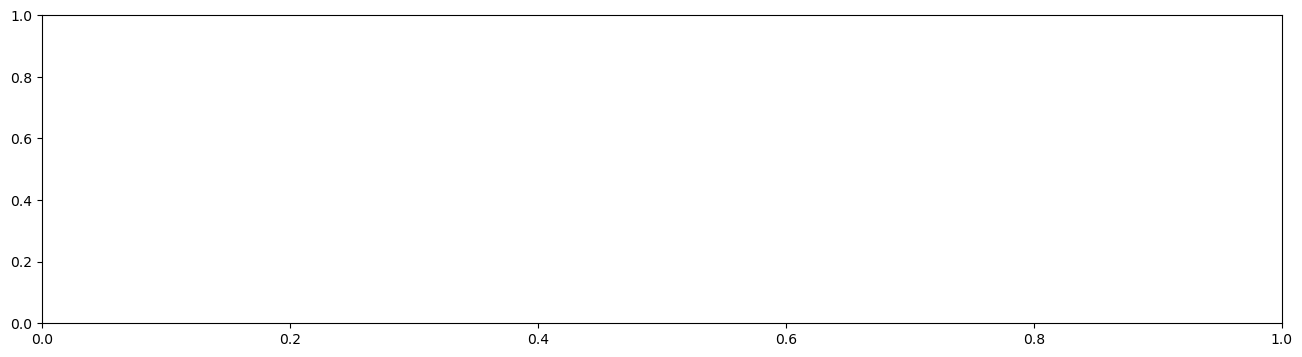

In [8]:
raw.crop(tmax=59.0).pick(picks=["mag", "eeg", "stim", "eog"])
raw.load_data()
print(raw)
plot_channel_time_series(raw, savebase=None, exclude_bads=False)

In [ ]:
regexp = r"(MEG [12][45][123])"
artifact_picks = mne.pick_channels_regexp(raw.ch_names, regexp=regexp)
raw.plot(order=artifact_picks, n_channels=len(artifact_picks), show_scrollbars=False)

In [ ]:
preproc_file = Path(f"/Users/podlaskijacek/Documents/HMM-Analysis/s_01_preproc-raw.fif") #.fif file format
preproc_file.parent.mkdir(parents=True, exist_ok=True)
raw.save(preproc_file, overwrite=True)

Writing /Users/podlaskijacek/Documents/HMM-Analysis/s_01_preproc-raw.fif
Closing /Users/podlaskijacek/Documents/HMM-Analysis/s_01_preproc-raw.fif
[done]


[PosixPath('/Users/podlaskijacek/Documents/HMM-Analysis/s_01_preproc-raw.fif')]